In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import random

In [ ]:
# データ準備
all_df = pd.read_json("STS_All.json", orient="records")


df_lst = [
    all_df[(all_df["publication_year"] > start) & (all_df["publication_year"] < end)]
    for start, end in zip([1990, 1995, 2000, 2005, 2010, 2015, 2020], [1996, 2001, 2006, 2011, 2016, 2021, 2026])
]
year_list = [1991, 1996, 2001, 2006, 2011, 2016, 2021]




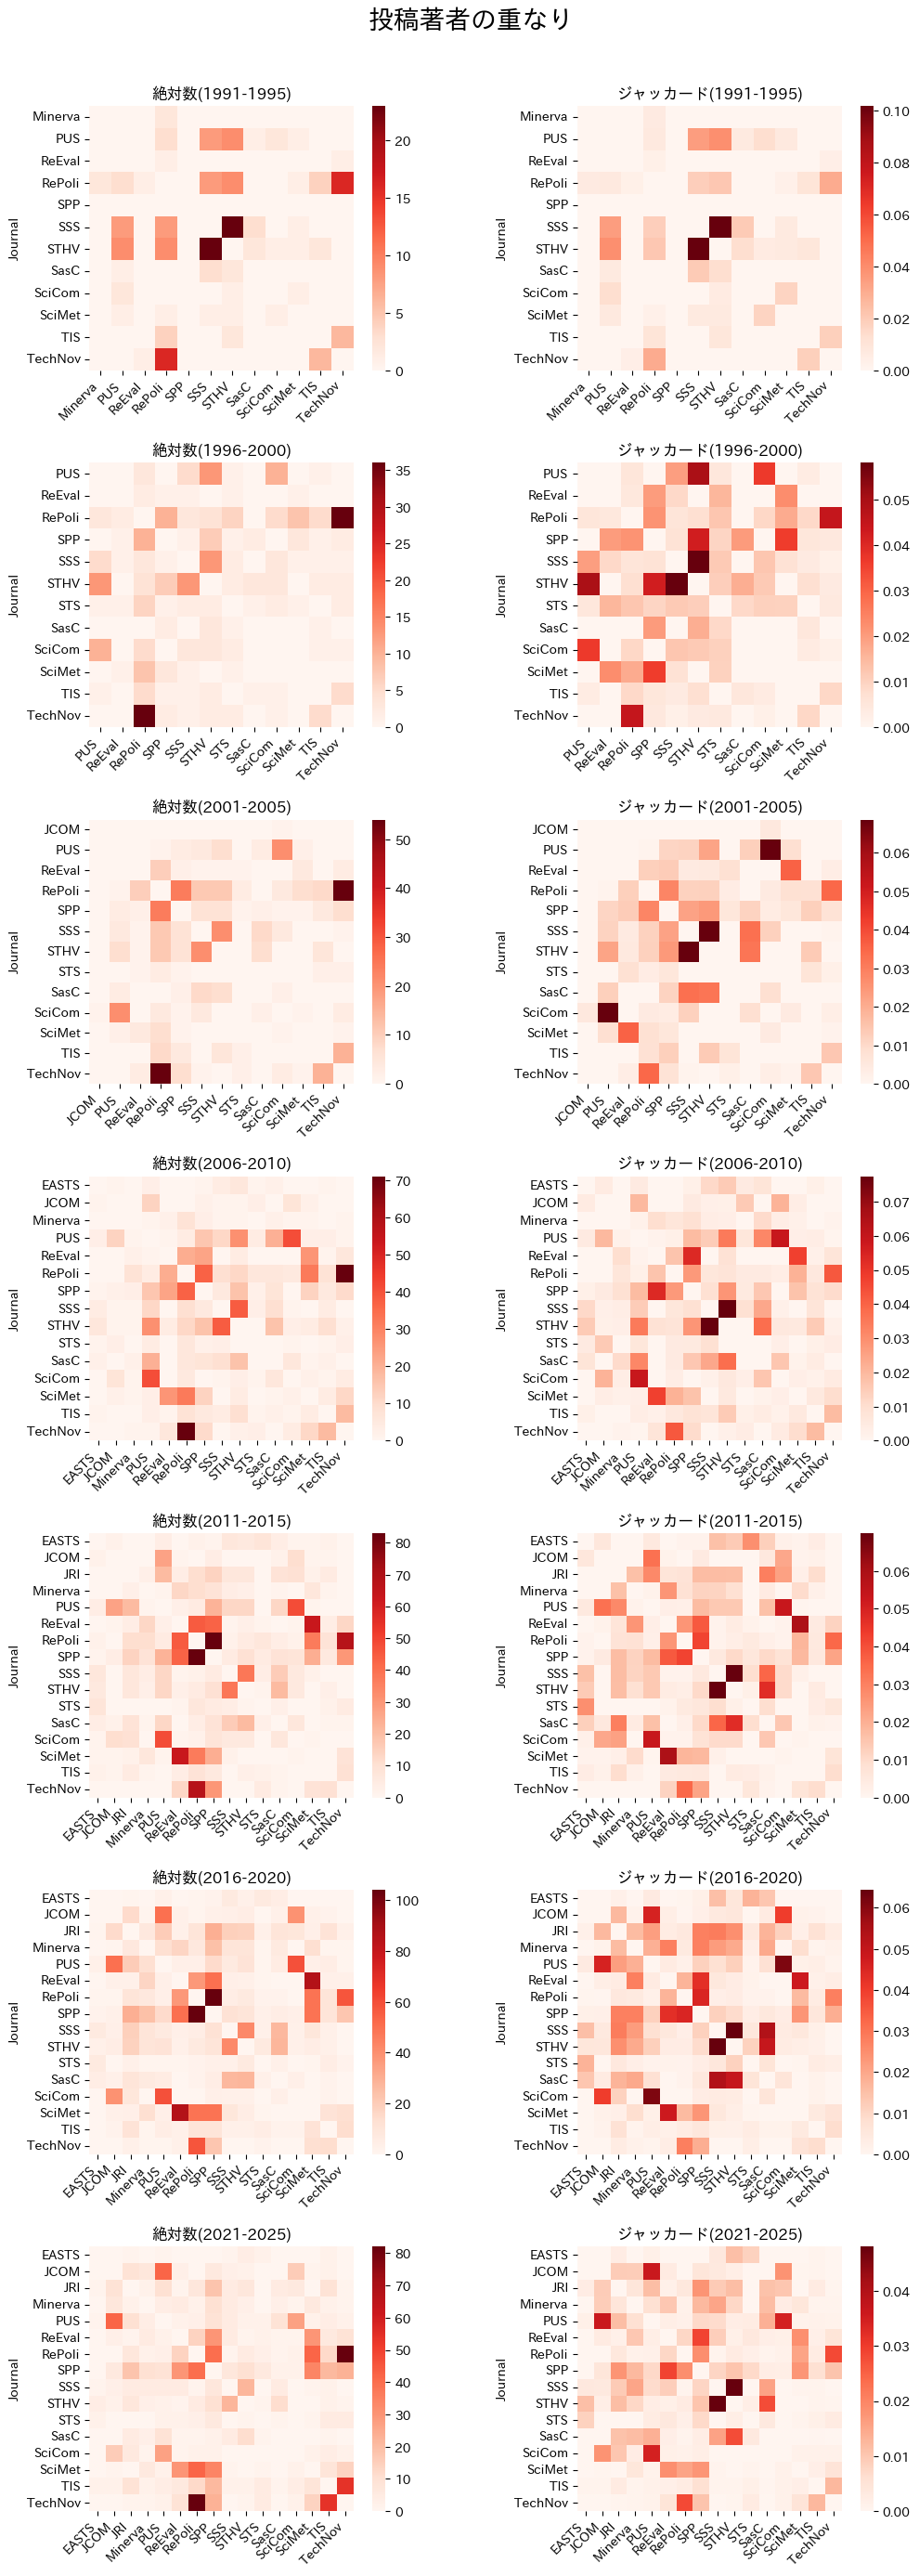

In [ ]:
# ヒートマップ生成関数
def generate_large_heatmap(df_lst, year_list):
    num_years = len(df_lst)
    fig, axes = plt.subplots(num_years, 2, figsize=(12, 5 * num_years))  # 各図の縦幅を調整

    for year_idx, base_df in enumerate(df_lst):
        # 各ジャーナルに所属する人名のセットを計算
        journal_authors = base_df.groupby("journal_name")["authorships"].agg(lambda x: set(sum(x, [])))

        # ジャーナル名リスト
        journals = journal_authors.index

        # 共著者数行列 (N_ij) を計算
        N_ij = pd.DataFrame(np.zeros((len(journals), len(journals))), index=journals, columns=journals)
        for i, journal_i in enumerate(journals):
            for j, journal_j in enumerate(journals):
                if i != j:
                    shared_authors = journal_authors[journal_i] & journal_authors[journal_j]
                    N_ij.at[journal_i, journal_j] = len(shared_authors)

        # ジャッカード類似度行列 (J_ij) を計算
        J_ij = pd.DataFrame(np.zeros((len(journals), len(journals))), index=journals, columns=journals)
        for i, journal_i in enumerate(journals):
            for j, journal_j in enumerate(journals):
                if i != j:
                    authors_i = journal_authors[journal_i]
                    authors_j = journal_authors[journal_j]
                    intersection = len(authors_i & authors_j)
                    union = len(authors_i | authors_j)
                    J_ij.at[journal_i, journal_j] = intersection / union if union > 0 else 0

        # 絶対数ヒートマップ
        sns.heatmap(N_ij, annot=False, fmt='.0f', cmap="Reds", ax=axes[year_idx, 0], cbar=True, square=True)
        axes[year_idx, 0].set_title(f"絶対数({year_list[year_idx]}-{year_list[year_idx]+4})", fontsize=12)
        axes[year_idx, 0].set_ylabel("Journal")
        axes[year_idx, 0].set_xlabel("")  # x軸タイトルを削除
        axes[year_idx, 0].set_xticklabels(axes[year_idx, 0].get_xticklabels(), rotation=45, ha="right")

        # ジャッカード類似度ヒートマップ
        sns.heatmap(J_ij, annot=False, fmt=".2f", cmap="Reds", ax=axes[year_idx, 1], cbar=True, square=True)
        axes[year_idx, 1].set_title(f"ジャッカード({year_list[year_idx]}-{year_list[year_idx]+4})", fontsize=12)
        axes[year_idx, 1].set_ylabel("Journal")
        axes[year_idx, 1].set_xlabel("")  # x軸タイトルを削除
        axes[year_idx, 1].set_xticklabels(axes[year_idx, 1].get_xticklabels(), rotation=45, ha="right")

    # 図の間隔を調整
    plt.subplots_adjust(wspace=0.3, hspace=0.35, top=0.85)  # トップ部分を調整

    # 図全体のタイトル
    fig.suptitle("投稿著者の重なり", fontsize=20, x=0.5, y=0.88)  # タイトルを少し近づける

    plt.show()

# データフレームリストと年リストを渡して実行
generate_large_heatmap(df_lst, year_list)
